In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# replace with full dataset if desired
df = pd.read_csv('sample_data.csv')
df.head()

,data_id,iso,event_id_cnty,event_id_no_cnty,event_date,year,time_precision,event_type,sub_event_type,actor1,...,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp,iso3
0,9442238,275,PSE15965,15965,12 August 2022,2022,1,Riots,Mob violence,Rioters (Palestine),...,Huwwarah,32.1522,35.2567,2,Quds News Network; Ma'an News Agency; Palestin...,National,"On 12 August 2022, Palestinian rioters clashed...",0,1660570938,PSE
1,9442238,275,PSE15965,15965,12 August 2022,2022,1,Riots,Mob violence,Military Forces of Israel (2021-),...,Huwwarah,32.1522,35.2567,2,Quds News Network; Ma'an News Agency; Palestin...,National,"On 12 August 2022, Palestinian rioters clashed...",0,1660570938,PSE
2,9442239,275,PSE15966,15966,12 August 2022,2022,1,Riots,Violent demonstration,Rioters (Palestine),...,Kafr Qaddum,32.2216,35.1447,1,Palestine News and Information Agency; Ma'an N...,National,"On 12 August 2022, Palestinian rioters clashed...",0,1660570938,PSE
3,9442239,275,PSE15966,15966,12 August 2022,2022,1,Riots,Violent demonstration,Military Forces of Israel (2021-),...,Kafr Qaddum,32.2216,35.1447,1,Palestine News and Information Agency; Ma'an N...,National,"On 12 August 2022, Palestinian rioters clashed...",0,1660570938,PSE
4,9442313,275,PSE16079,16079,12 August 2022,2022,1,Riots,Violent demonstration,Rioters (Palestine),...,Al Bireh,31.9053,35.2150,1,Palestine News and Information Agency; Quds Ne...,National,"On 12 August 2022, Palestinian rioters clashed...",0,1660570938,PSE


In [20]:
cols = ['source', 'source_scale', 'notes']
sources = df[cols]

# some combinations of sources are in different orders. Creating source_cleaned to fix this
sources['source_cleaned'] = [str(sorted(s.split('; '))) for s in sources['source']]

sources.head(10)

C:\Users\15714\AppData\Local\Temp/ipykernel_27288/1300603276.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sources['source_cleaned'] = [str(sorted(s.split('; '))) for s in sources['source']]


,source,source_scale,notes,source_cleaned
0,Quds News Network; Ma'an News Agency; Palestin...,National,"On 12 August 2022, Palestinian rioters clashed...","[""Ma'an News Agency"", 'Palestine News and Info..."
1,Quds News Network; Ma'an News Agency; Palestin...,National,"On 12 August 2022, Palestinian rioters clashed...","[""Ma'an News Agency"", 'Palestine News and Info..."
2,Palestine News and Information Agency; Ma'an N...,National,"On 12 August 2022, Palestinian rioters clashed...","[""Ma'an News Agency"", 'Palestine News and Info..."
3,Palestine News and Information Agency; Ma'an N...,National,"On 12 August 2022, Palestinian rioters clashed...","[""Ma'an News Agency"", 'Palestine News and Info..."
4,Palestine News and Information Agency; Quds Ne...,National,"On 12 August 2022, Palestinian rioters clashed...","['Palestine News and Information Agency', 'Qud..."
5,Palestine News and Information Agency; Quds Ne...,National,"On 12 August 2022, Palestinian rioters clashed...","['Palestine News and Information Agency', 'Qud..."
6,Dunia Al Watan; Palestine News and Information...,National,"Property destruction: On 12 August 2022, Israe...","['Dunia Al Watan', 'Palestine News and Informa..."
7,Dunia Al Watan; Palestine News and Information...,National,"Property destruction: On 12 August 2022, Israe...","['Dunia Al Watan', 'Palestine News and Informa..."
8,Palestine News and Information Agency; Quds Ne...,National,"On 12 August 2022, Palestinian rioters clashed...","['Palestine News and Information Agency', 'Qud..."
9,Palestine News and Information Agency; Quds Ne...,National,"On 12 August 2022, Palestinian rioters clashed...","['Palestine News and Information Agency', 'Qud..."


<AxesSubplot:xlabel='count', ylabel='source_scale'>

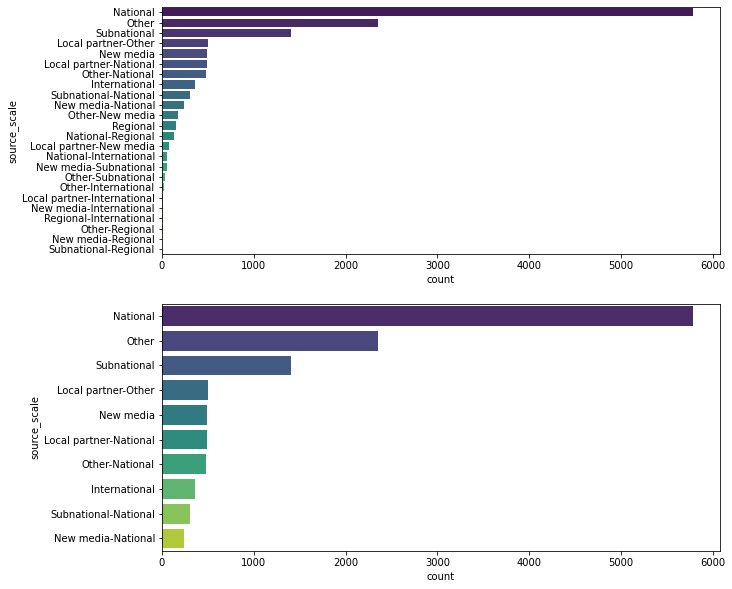

In [21]:
fig, ax = plt.subplots(2, figsize=(10, 10))
palette = 'viridis'

sns.countplot(ax=ax[0],palette=palette, y=sources['source_scale'], order=pd.value_counts(sources['source_scale']).index)
sns.countplot(ax=ax[1],palette=palette, y=sources['source_scale'], order=pd.value_counts(sources['source_scale'])[:10].index)

#### It looks like the majority of entries are on a national scale.

In [22]:
# Since sources that appear to report the same event are separated by a semicolon, we have to expand this column to get the
# count of times a source has reported on an event
sources_list = list()
for s in sources['source']:
    for i in s.split('; '):
        sources_list.append(i)

In [23]:
# putting into Pandas df to get counts
source_expanded = pd.DataFrame({'source': sources_list})
source_expanded.groupby('source')['source'].size().reset_index(name='count').sort_values('count', axis=0, ascending=False)

,source,count
931,Ministry of Defence of Ukraine,1436
1477,Yemen Data Project,490
1203,SOHR,478
1200,SHAAM,465
1387,Undisclosed Source,419
...,...,...
798,La Nouvelle Gazette,1
801,La Opinion De Murcia,1
808,La Prensa Chimborazo,1
815,La Razon (Spain),1


<AxesSubplot:xlabel='count', ylabel='source'>

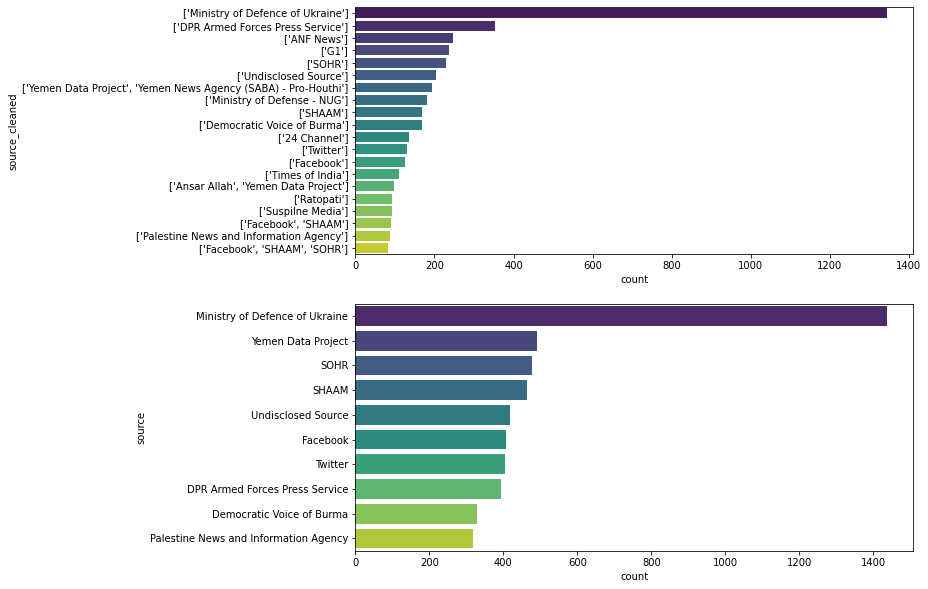

In [24]:
fig, ax = plt.subplots(2, figsize=(10, 10))
palette = 'viridis'

# Plot of sources
sns.countplot(ax=ax[0], palette=palette, y=sources['source_cleaned'], order=pd.value_counts(sources['source_cleaned']).iloc[:20].index)

# Plot of individually counted sources
sns.countplot(ax=ax[1], palette=palette, y=source_expanded['source'], order=pd.value_counts(source_expanded['source']).iloc[:10].index)

### Yemen Data Project appears very common in the individually counted sources, but raw sources only show the source paired with another source.

### Exploring these below:

<AxesSubplot:xlabel='count', ylabel='source_cleaned'>

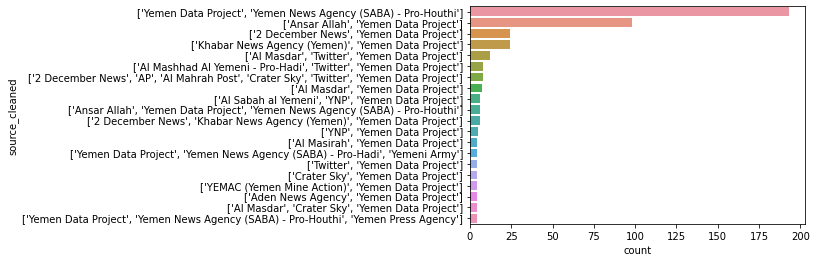

In [25]:
yemen = sources[sources['source_cleaned'].str.contains('Yemen Data Project')]
sns.countplot(y=yemen['source_cleaned'], order=pd.value_counts(yemen['source_cleaned']).iloc[:20].index)

# NLP on 'notes' column

In [31]:
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import FreqDist

from wordcloud import WordCloud


# tokenizer that removes punctuation
tokenizer = RegexpTokenizer(r'\w+')

lemmatizer = WordNetLemmatizer()

# creating one big string of all of the values in the 'notes' column
text = ''
for n in sources['notes']:
    text += n + ' '
    
tokens = tokenizer.tokenize(text)

# lemmatizing words
lem_words = [lemmatizer.lemmatize(w) for w in tokens]

# getting frequency distribution
dist_lem = FreqDist(lem_words)

[('the', 23318), ('in', 17962), ('of', 14077), ('a', 13747), ('August', 13500), ('2022', 13350), ('and', 12989), ('On', 12344), ('to', 7707), ('force', 5667), ('size', 4592), ('no', 4483), ('unknown', 4161), ('were', 3928), ('report', 3829)]


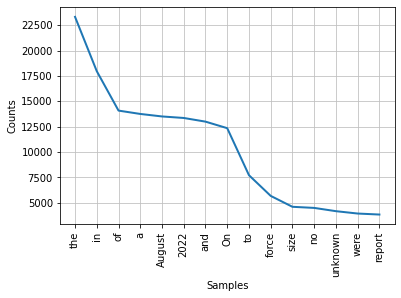

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [27]:
# plotting most common words
print(dist_lem.most_common(15))
dist_lem.plot(15)

#### Looks like there were some stopwords. Removing those and trying again.

[('August', 13500), ('2022', 13350), ('force', 5667), ('size', 4592), ('unknown', 4161), ('report', 3829), ('Casualties', 3139), ('1', 2654), ('protest', 2352), ('district', 2336), ('military', 2236), ('killed', 2223), ('Russian', 2086), ('Al', 2070), ('member', 2067)]


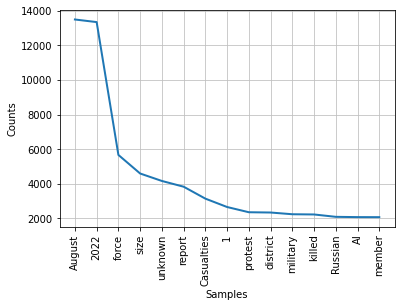

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [35]:
# removing stopwords and replotting

stop_words = set(stopwords.words('english'))
tokens_cleaned = [w for w in tokens if w.lower() not in stop_words]

lem_words_cleaned = [lemmatizer.lemmatize(w) for w in tokens_cleaned]
dist_lem_cleaned = FreqDist(lem_words_cleaned)

print(dist_lem_cleaned.most_common(15))
dist_lem_cleaned.plot(15)

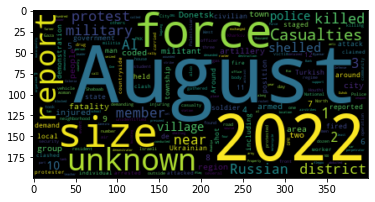

In [37]:
wc = WordCloud().generate_from_frequencies(dist_lem_cleaned)
plt.imshow(wc, interpolation='bilinear')

# Creating DataFrame of joined individual sources

In [29]:
# First, we need a list of distinct sources
sources_distinct = list(set(sources_list))
sources_distinct_df = pd.DataFrame({'source_singular': sources_distinct})

# since eventually we're using a LIKE clause for the join, we need to add percentage wildcards here because we can't in pandasql.
sources_distinct_df['source_singular'] = sources_distinct_df['source_singular'].apply(lambda x: f'%{x}%')

# Second, join this df with the sources df with the help of pandasql

from pandasql import sqldf 
sql = lambda q: sqldf(q, globals())

expanded_source_df = sql('''
    SELECT * FROM sources s
    JOIN sources_distinct_df sd
    ON s.source LIKE sd.source_singular
''')

# removing percentage wildcards
expanded_source_df['source_singular'] = expanded_source_df['source_singular'].apply(lambda x: x.replace('%', ''))
expanded_source_df.head()

,source,source_scale,notes,source_cleaned,source_singular
0,Quds News Network; Ma'an News Agency; Palestin...,National,"On 12 August 2022, Palestinian rioters clashed...","[""Ma'an News Agency"", 'Palestine News and Info...",Quds News Network
1,Quds News Network; Ma'an News Agency; Palestin...,National,"On 12 August 2022, Palestinian rioters clashed...","[""Ma'an News Agency"", 'Palestine News and Info...",Palestine News and Information Agency
2,Quds News Network; Ma'an News Agency; Palestin...,National,"On 12 August 2022, Palestinian rioters clashed...","[""Ma'an News Agency"", 'Palestine News and Info...",Ma'an News Agency
3,Quds News Network; Ma'an News Agency; Palestin...,National,"On 12 August 2022, Palestinian rioters clashed...","[""Ma'an News Agency"", 'Palestine News and Info...",Quds News Network
4,Quds News Network; Ma'an News Agency; Palestin...,National,"On 12 August 2022, Palestinian rioters clashed...","[""Ma'an News Agency"", 'Palestine News and Info...",Palestine News and Information Agency


#### Now, we can analyze singular sources based on other columns of interest.